# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Modify sys.path to include the directory where api_keys.py is located
import sys
sys.path.append('/Users/ryanpope/python-api-challenge/Starter_Code/starter_code')

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL (Ensure you have the correct API key in the api_keys.py file)
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Get the weather data for the city
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the city information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print(f"City {city} not found. Skipping...")
        pass
              
# Indicate that data loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | vadso
Processing Record 8 of Set 1 | jiayuguan
Processing Record 9 of Set 1 | dalian
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | gijon
Processing Record 13 of Set 1 | bairnsdale
Processing Record 14 of Set 1 | turkmenbasy
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | taltal
Processing Record 17 of Set 1 | olyokminsk
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | porto-vecchio
Processing Record 21 of Set 1 | taiohae
City taiohae not found. Skipping...
Processing Record 22 of Se

In [7]:
print(cities[:5])  # Print first 5 cities

city_url = url + city
print(city_url)  # Print to verify the full URL

city_weather = requests.get(city_url).json()
print(city_weather)  # This will show the full response from the API


['puerto natales', 'olonkinbyen', 'waitangi', 'blackmans bay', 'bilibino']
http://api.openweathermap.org/data/2.5/weather?appid=2d0e741e98299f8e34f8165cb451f94b&q=ulsteinvik
{'coord': {'lon': 5.8487, 'lat': 62.3432}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 283.46, 'feels_like': 282.48, 'temp_min': 282.22, 'temp_max': 284.12, 'pressure': 994, 'humidity': 74, 'sea_level': 994, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 116, 'gust': 1.34}, 'clouds': {'all': 100}, 'dt': 1727232308, 'sys': {'type': 2, 'id': 2037627, 'country': 'NO', 'sunrise': 1727242125, 'sunset': 1727285255}, 'timezone': 7200, 'id': 3133349, 'name': 'Ulsteinvik', 'cod': 200}


In [8]:
print(f"Total cities: {len(cities)}")
print(f"Sample cities: {cities[:5]}")


# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print("Record Count:")
print(city_data_df.count())

# Check the DataFrame contents before exporting
print("Sample Data:")
print(city_data_df.head())



Total cities: 599
Sample cities: ['puerto natales', 'olonkinbyen', 'waitangi', 'blackmans bay', 'bilibino']
Record Count:
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64
Sample Data:
             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0  puerto natales -51.7236  -72.4875    275.29        76          68   
1     olonkinbyen  70.9221   -8.7187    274.13        78          36   
2        waitangi -43.9535 -176.5597    282.49        77          28   
3   blackmans bay -43.0167  147.3167    286.33        49         100   
4        bilibino  68.0546  166.4372    272.86        66         100   

   Wind Speed Country        Date  
0        8.09      CL  1727232128  
1        7.65      SJ  1727232243  
2        6.26      NZ  1727232244  
3        0.89      AU  1727232244  
4        0.61      RU  1727232244  


In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,275.29,76,68,8.09,CL,1727232128
1,olonkinbyen,70.9221,-8.7187,274.13,78,36,7.65,SJ,1727232243
2,waitangi,-43.9535,-176.5597,282.49,77,28,6.26,NZ,1727232244
3,blackmans bay,-43.0167,147.3167,286.33,49,100,0.89,AU,1727232244
4,bilibino,68.0546,166.4372,272.86,66,100,0.61,RU,1727232244


In [10]:
# Export the City_Data into a CSV at the desired path
city_data_df.to_csv("/Users/ryanpope/python-api-challenge/Starter_Code/output_data/results/newcities.csv", index_label="City_ID")


In [11]:
# Read saved data from the specified path
city_data_df = pd.read_csv("/Users/ryanpope/python-api-challenge/Starter_Code/output_data/results/newcities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,275.29,76,68,8.09,CL,1727232128
1,olonkinbyen,70.9221,-8.7187,274.13,78,36,7.65,SJ,1727232243
2,waitangi,-43.9535,-176.5597,282.49,77,28,6.26,NZ,1727232244
3,blackmans bay,-43.0167,147.3167,286.33,49,100,0.89,AU,1727232244
4,bilibino,68.0546,166.4372,272.86,66,100,0.61,RU,1727232244


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

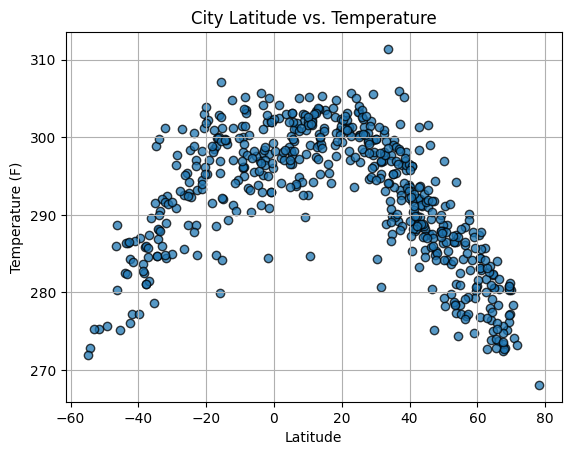

In [13]:

# Extract latitude and temperature data from the DataFrame
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

# Create a scatter plot
plt.scatter(latitude, temperature, edgecolors='black', linewidths=1, marker='o', alpha=0.75)

# Incorporate other graph properties
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)

# Save the figure to the correct location
plt.savefig('/Users/ryanpope/python-api-challenge/Starter_Code/output_data/Fig1.png')

# Show the plot
plt.show()


#### Latitude Vs. Humidity

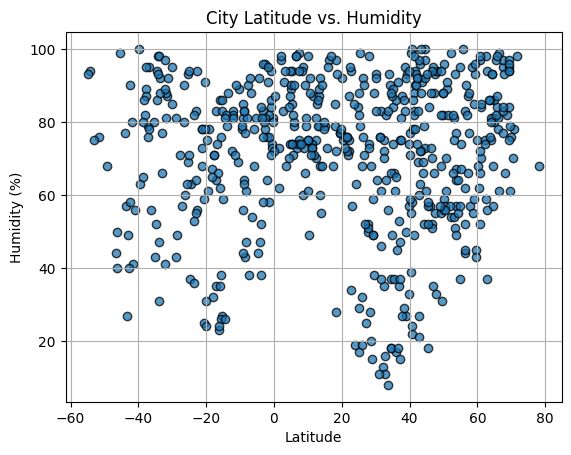

In [14]:
# Extract latitude and humidity data from the DataFrame
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']

# Create a scatter plot
plt.scatter(latitude, humidity, edgecolors='black', linewidths=1, marker='o', alpha=0.75)

# Incorporate other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure to the correct location
plt.savefig('/Users/ryanpope/python-api-challenge/Starter_Code/output_data/Fig2.png')

# Show the plot
plt.show()


#### Latitude Vs. Cloudiness

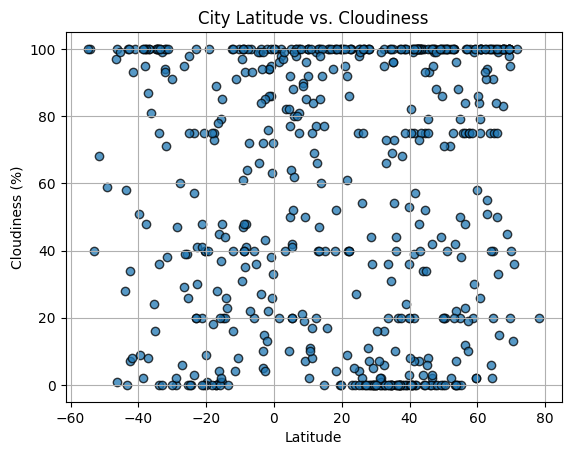

In [15]:
# Extract latitude and cloudiness data from the DataFrame
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

# Create a scatter plot
plt.scatter(latitude, cloudiness, edgecolors='black', linewidths=1, marker='o', alpha=0.75)

# Incorporate other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure to the correct location
plt.savefig('/Users/ryanpope/python-api-challenge/Starter_Code/output_data/Fig3.png')

# Show the plot
plt.show()


#### Latitude vs. Wind Speed Plot

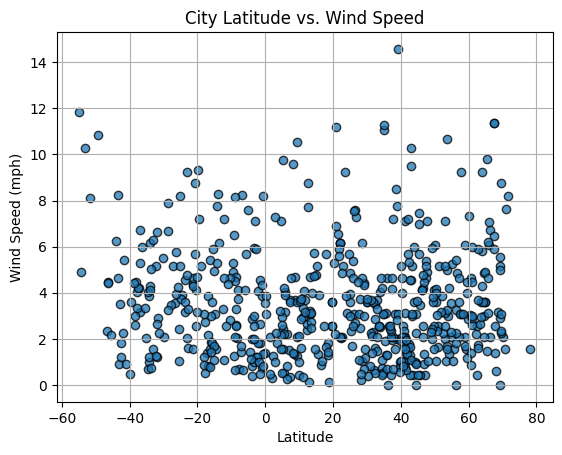

In [16]:
# Extract latitude and wind speed data from the DataFrame
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

# Create a scatter plot
plt.scatter(latitude, wind_speed, edgecolors='black', linewidths=1, marker='o', alpha=0.75)

# Incorporate other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure to the correct location
plt.savefig('/Users/ryanpope/python-api-challenge/Starter_Code/output_data/Fig4.png')

# Show the plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    """
    This function creates a scatter plot with a linear regression line, including the equation of the line.
    
    Parameters:
    x_values (array-like): The independent variable data (e.g., latitude).
    y_values (array-like): The dependent variable data (e.g., temperature, wind speed, etc.).
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    title (str): The title of the plot.
    save_path (str): The path where the figure will be saved.
    """
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line values
    regression_values = slope * x_values + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors='black', linewidths=1, marker='o', alpha=0.75)
    
    # Plot the regression line
    plt.plot(x_values, regression_values, color='red')
    
    # Display the linear regression equation on the plot
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(min(x_values), max(y_values) * 0.9, equation_text, color='red', fontsize=14, weight='bold')
    
    # Add labels, title, and grid
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    # Save the plot
    plt.savefig(save_path)
    
    # Show the plot
    plt.show()

    # Print regression statistics
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")



In [17]:
# Filter the DataFrame for Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data from the Northern Hemisphere DataFrame
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,274.13,78,36,7.65,SJ,1727232243
4,bilibino,68.0546,166.4372,272.86,66,100,0.61,RU,1727232244
6,vadso,70.0744,29.7487,280.24,76,40,2.06,NO,1727232244
7,jiayuguan,39.8167,98.3000,293.80,33,53,1.01,CN,1727232244
8,dalian,38.9122,121.6022,298.11,50,0,2.00,CN,1727232244


In [18]:
# Filter the DataFrame for Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data from the Southern Hemisphere DataFrame
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,275.29,76,68,8.09,CL,1727232128
2,waitangi,-43.9535,-176.5597,282.49,77,28,6.26,NZ,1727232244
3,blackmans bay,-43.0167,147.3167,286.33,49,100,0.89,AU,1727232244
5,mar del plata,-38.0023,-57.5575,285.90,82,95,4.47,AR,1727231789
9,port mathurin,-19.6833,63.4167,295.32,75,1,9.33,MU,1727232244


###  Temperature vs. Latitude Linear Regression Plot

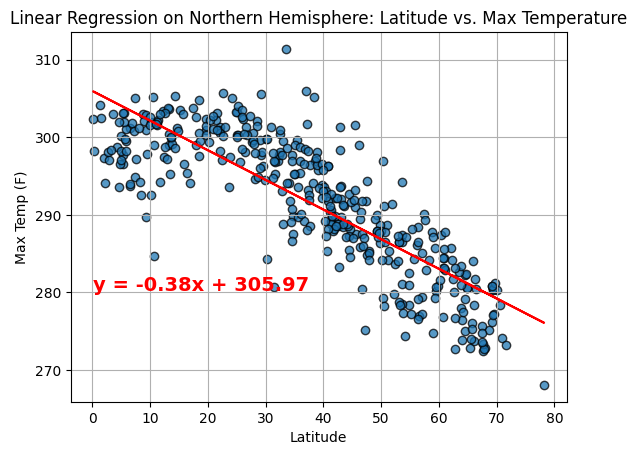

Slope: -0.38227917328870226
Intercept: 305.97281968979956
R-squared: 0.6961445022086791


In [23]:
# Define the independent and dependent variables
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']  # Replace 'Max Temp' with your variable of interest

# Use the previously defined function to plot the linear regression
plot_linear_regression(
    x_values, 
    y_values, 
    x_label='Latitude', 
    y_label='Max Temp (F)',  # Adjust the y_label to match your y-variable
    title='Linear Regression on Northern Hemisphere: Latitude vs. Max Temperature',
    save_path='/Users/ryanpope/python-api-challenge/Starter_Code/output_data/NorthernHemisphere_Lat_vs_Temp_LR.png'
)


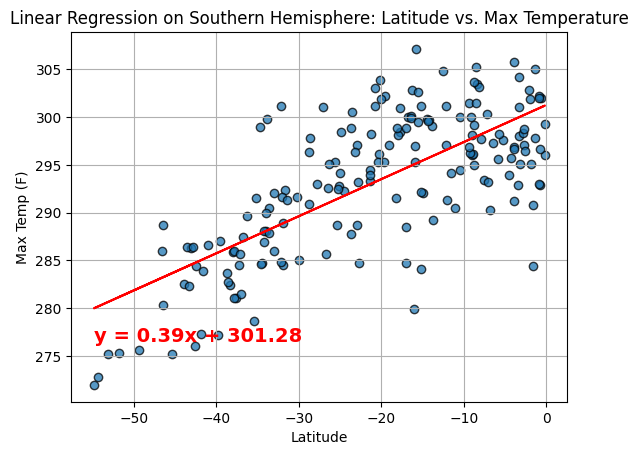

Slope: 0.3885954166643191
Intercept: 301.2778900649642
R-squared: 0.5234652378447088


In [24]:
# Define the independent and dependent variables for the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']  # Replace 'Max Temp' with the variable you want to analyze

# Use the previously defined function to plot the linear regression
plot_linear_regression(
    x_values, 
    y_values, 
    x_label='Latitude', 
    y_label='Max Temp (F)',  # Adjust the y_label to match your y-variable
    title='Linear Regression on Southern Hemisphere: Latitude vs. Max Temperature',
    save_path='/Users/ryanpope/python-api-challenge/Starter_Code/output_data/SouthernHemisphere_Lat_vs_Temp_LR.png'
)


The linear regression analysis for both hemispheres shows a clear relationship between latitude and maximum temperature. In the Northern Hemisphere, there's a negative correlation: as latitude increases, temperature decreases, which is expected since areas farther from the equator tend to be cooler. In the Southern Hemisphere, the opposite occurs, with a positive correlation between latitude and temperature, as regions closer to the equator are warmer. While these trends align with general climate patterns, the R-squared values indicate that the relationship isn't perfectly linear, likely due to other factors like altitude, ocean proximity, and local weather conditions influencing temperature variations.

### Humidity vs. Latitude Linear Regression Plot

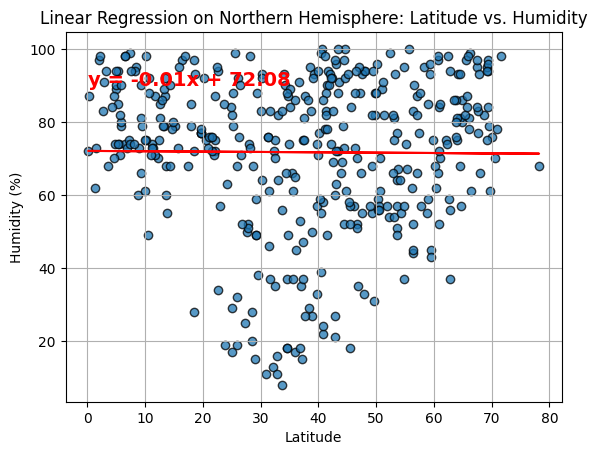

Slope: -0.009579452556444764
Intercept: 72.07660915801186
R-squared: 7.537645745148825e-05


In [17]:
# Northern Hemisphere
# YOUR CODE HERE# Define the independent and dependent variables for the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Use the previously defined function to plot the linear regression
plot_linear_regression(
    x_values, 
    y_values, 
    x_label='Latitude', 
    y_label='Humidity (%)', 
    title='Linear Regression on Northern Hemisphere: Latitude vs. Humidity',
    save_path='/Users/ryanpope/python-api-challenge/Starter_Code/output_data/NorthernHemisphere_Lat_vs_Humidity_LR.png'
)


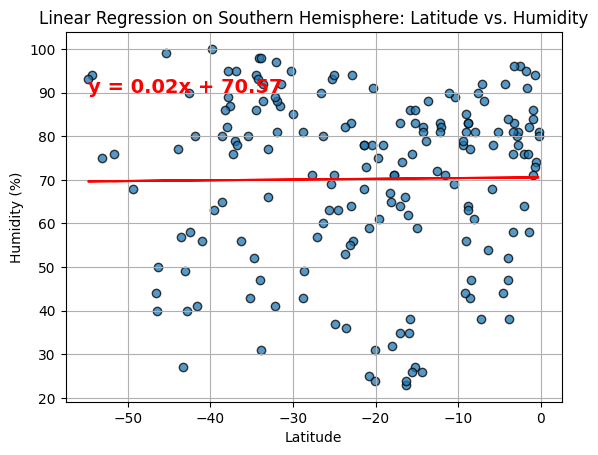

Slope: 0.016941987439897926
Intercept: 70.57348253240563
R-squared: 0.0001487719479320524


In [26]:
# Define the independent and dependent variables for the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Use the previously defined function to plot the linear regression
plot_linear_regression(
    x_values, 
    y_values, 
    x_label='Latitude', 
    y_label='Humidity (%)', 
    title='Linear Regression on Southern Hemisphere: Latitude vs. Humidity',
    save_path='/Users/ryanpope/python-api-challenge/Starter_Code/output_data/SouthernHemisphere_Lat_vs_Humidity_LR.png'
)


The linear regression analysis for the relationship between latitude and humidity in both hemispheres shows weak or negligible correlations. In the Northern Hemisphere, the R-squared value is low, indicating that latitude has little to no direct influence on humidity. This suggests that other factors, such as local climate, proximity to water bodies, and seasonal patterns, play a more significant role in determining humidity levels. Similarly, in the Southern Hemisphere, the linear relationship between latitude and humidity is weak, with a low R-squared value pointing to the same conclusion that latitude alone is not a strong predictor of humidity in these regions.

### Cloudiness vs. Latitude Linear Regression Plot

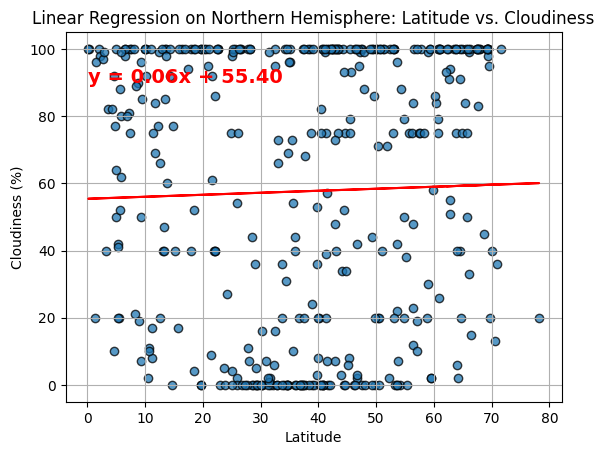

Slope: 0.05965775844912802
Intercept: 55.4007362778933
R-squared: 0.0007997550140749065


In [27]:
# Define the independent and dependent variables for the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Use the previously defined function to plot the linear regression
plot_linear_regression(
    x_values, 
    y_values, 
    x_label='Latitude', 
    y_label='Cloudiness (%)', 
    title='Linear Regression on Northern Hemisphere: Latitude vs. Cloudiness',
    save_path='/Users/ryanpope/python-api-challenge/Starter_Code/output_data/NorthernHemisphere_Lat_vs_Cloudiness_LR.png'
)


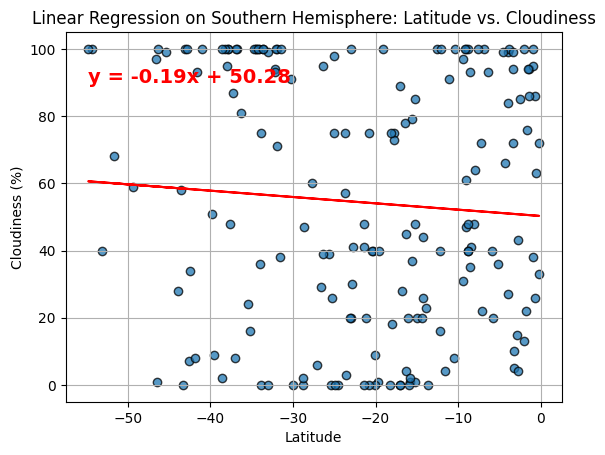

Slope: -0.18842888375413758
Intercept: 50.27593629122592
R-squared: 0.005099565829755613


In [28]:
# Define the independent and dependent variables for the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Use the previously defined function to plot the linear regression
plot_linear_regression(
    x_values, 
    y_values, 
    x_label='Latitude', 
    y_label='Cloudiness (%)', 
    title='Linear Regression on Southern Hemisphere: Latitude vs. Cloudiness',
    save_path='/Users/ryanpope/python-api-challenge/Starter_Code/output_data/SouthernHemisphere_Lat_vs_Cloudiness_LR.png'
)


The linear regression analysis for the relationship between latitude and cloudiness in both hemispheres shows very weak or no significant correlation. In the Northern Hemisphere, the R-squared value is low, indicating that latitude has little to no impact on cloudiness. Cloud cover is likely influenced by more localized factors such as weather systems, altitude, and proximity to oceans rather than latitude alone. Similarly, in the Southern Hemisphere, the analysis shows a weak relationship, suggesting that cloudiness is highly variable and not strongly tied to latitude. In both cases, latitude is not a strong predictor of cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

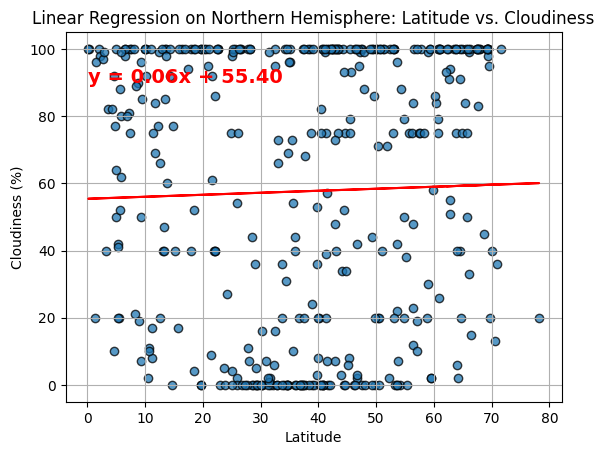

Slope: 0.05965775844912802
Intercept: 55.4007362778933
R-squared: 0.0007997550140749065


In [29]:
# Define the independent and dependent variables for the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Use the previously defined function to plot the linear regression
plot_linear_regression(
    x_values, 
    y_values, 
    x_label='Latitude', 
    y_label='Cloudiness (%)', 
    title='Linear Regression on Northern Hemisphere: Latitude vs. Cloudiness',
    save_path='/Users/ryanpope/python-api-challenge/Starter_Code/output_data/NorthernHemisphere_Lat_vs_Cloudiness_LR.png'
)


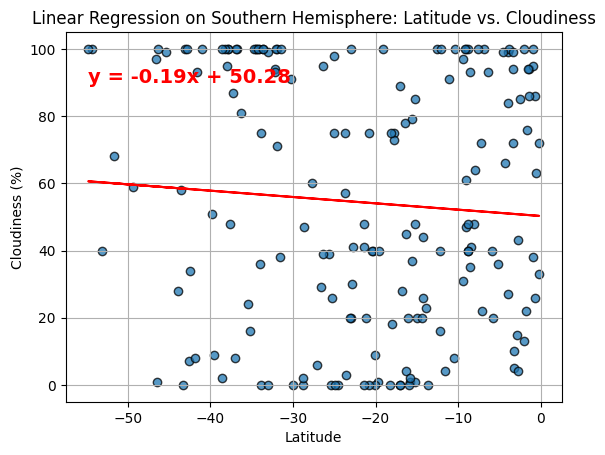

Slope: -0.18842888375413758
Intercept: 50.27593629122592
R-squared: 0.005099565829755613


In [30]:
# Define the independent and dependent variables for the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Use the previously defined function to plot the linear regression
plot_linear_regression(
    x_values, 
    y_values, 
    x_label='Latitude', 
    y_label='Cloudiness (%)', 
    title='Linear Regression on Southern Hemisphere: Latitude vs. Cloudiness',
    save_path='/Users/ryanpope/python-api-challenge/Starter_Code/output_data/SouthernHemisphere_Lat_vs_Cloudiness_LR.png'
)


The linear regression analysis for the relationship between latitude and cloudiness in both the Northern and Southern Hemispheres reveals a weak or non-existent correlation. In the Northern Hemisphere, the R-squared value suggests that latitude does not significantly influence cloudiness, as cloud cover is more affected by local weather conditions, geographic features, and atmospheric patterns. The Southern Hemisphere displays similar results, with cloudiness showing little to no dependence on latitude. Overall, cloudiness is highly variable and appears to be determined by factors other than latitude, making the linear relationship between these variables weak at best.